# TimML Exercises

## Exercise 4: Horizontal wells

A horizontal well is located in a 20 m thick aquifer; the hydraulic conductivity is $k = 10$ m/d and the vertical
anisotropy factor is 0.1. The horizontal well is placed 5 m above the bottom of the aquifer. The well has
a discharge of 10,000 m$^3$/d and radius of $r=0.2$ m. The well is 200 m long and runs from $(x, y) = (−100, 0)$
to $(x, y) = (100, 0)$. A long straight river with a head of 40 m runs to the right of the horizontal well along the line
$x = 200$. The head is fixed to 42 m at $(x, y) = (−1000, 0)$.

Three-dimensional flow to the horizontal well is modeled by dividing the aquifer up in 11 layers; the
elevations are: `[20, 15, 10, 8, 6, 5.5, 5.2, 4.8, 4.4, 4, 2, 0]`. At the depth of the well, the layer thickness is equal to
the diameter of the well, and it increases away from the well. A TimML model is created with the Model3D
command. The horizontal well is located in layer 6 and is modeled with the `LineSinkDitch` element. Initially, the screen resistance of the well is set to zero.

In [1]:
from timml import *
from pylab import *
%matplotlib notebook

In [2]:
z = [20, 15, 10, 8, 6, 5.5, 5.2, 4.8, 4.4, 4, 2, 0]
ml = Model3D(z, kh=10, kzoverkh=0.1)

# Create the horizontal well
xy = [(-100, 0.0), (-90, 0.0), (-80, 0.0), (-70, 0.0), (-60, 0.0), (-50, 0.0), (-40, 0.0),\
      (-30, 0.0), (-20, 0.0), (-10, 0.0), (0, 0.0), (10, 0.0), (20, 0.0), (30, 0.0), (40, 0.0),\
      (50, 0.0), (60, 0.0), (70, 0.0), (80, 0.0), (90, 0.0), (100, 0.0)]
ls = LineSinkDitch(ml, xylist=xy, Q=10000, res=0, width=0.4, layers=[6])

HeadLineSink(ml, 200, -1000, 200, -500, 40, 0)
HeadLineSink(ml, 200, -500, 200, -200, 40, 0)
HeadLineSink(ml, 200, -200, 200, -100, 40, 0)
HeadLineSink(ml, 200, -100, 200, 0, 40, 0)
HeadLineSink(ml, 200, 0, 200, 100, 40, 0)
HeadLineSink(ml, 200, 100, 200, 200, 40, 0)
HeadLineSink(ml, 200, 200, 200, 500, 40, 0)
HeadLineSink(ml, 200, 500, 200, 1000, 40, 0)

rf = Constant(ml, xr=-1000, yr=0, head=42, layer=0)

### Questions:
#### Exercise 4a
Solve the model.

In [3]:
ml.solve()

Starting solve
Number of elements:  10
Percent progress:  0  
size of matrix (29, 29)
Solution complete


#### Exercise 4b
Create contour plots of layers 0 and 6 and note the difference between the layers. Also,
compute the head at $(x, y) = (0, 0.2)$ (on the edge of the well) and notice that there is a very large head
difference between the top of the aquifer and the well.

grid of (50, 50). gridding in progress. hit ctrl-c to abort


<IPython.core.display.Javascript object>


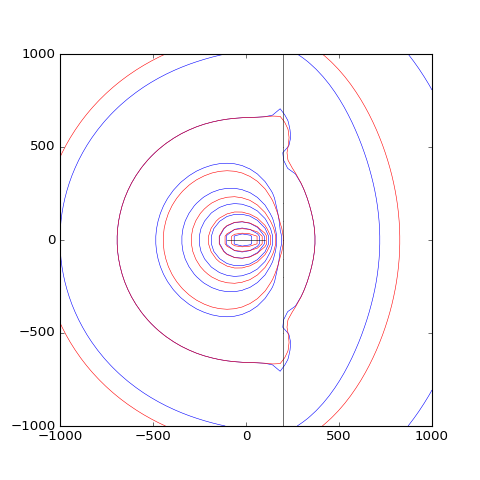

done with contouring
done with contouring
The head at the top and in layer 6 are:
[ 24.76002601  13.26744043]


In [4]:
timcontour(ml, 
           xmin=-1000, xmax=1000, nx=50, 
           ymin=-1000, ymax=1000, ny=50, 
           layers = [0, 6],
           size=(6,6))
print 'The head at the top and in layer 6 are:'
print ml.head([0, 6], 0, 0.2)

#### Exercise 4c
Draw a number of pathlines from different elevations using the `timtracelines` command. First make a contour plot with a cross section below it.  

grid of (50, 50). gridding in progress. hit ctrl-c to abort


<IPython.core.display.Javascript object>


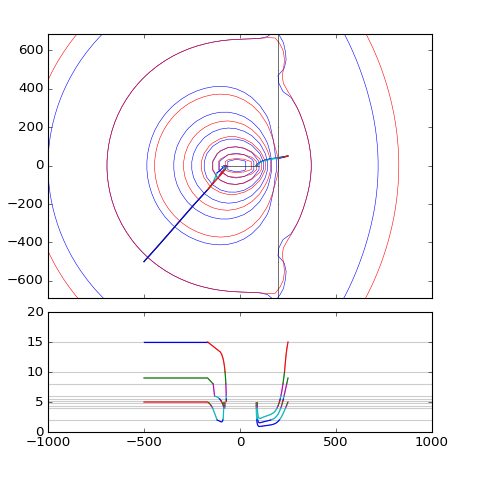

done with contouring
done with contouring
reached element of type linesink
reached maximum number of steps
reached element of type linesink
reached element of type linesink
reached element of type linesink
reached element of type linesink


In [5]:
timcontour(ml, 
           xmin=-1000, xmax=1000, nx=50, 
           ymin=-1000, ymax=1000, ny=50, 
           layers = [0, 6], 
           xsec = True,
           size=(6,6))
# trace lines from other side of river
timtracelines(ml, 
              xlist=[250, 250, 250], 
              ylist=[50, 50, 50], 
              zlist=[5, 9, 15], 
              step=100, 
              tmax=10*365.25, 
              xsec=True)
# trace lines from left side of river
timtracelines(ml, 
              xlist=[-500, -500, -500], 
              ylist=[-500, -500, -500], 
              zlist=[5, 9, 15], 
              step=100, 
              tmax=10*365.25, 
              xsec=True)

#### Exercise 4d
Make a contour plot of the heads in a vertical cross-section using the `timvertcontour()` command. Use a cross-section along the well.

grid of (50, 50). gridding in progress. hit ctrl-c to abort


<IPython.core.display.Javascript object>


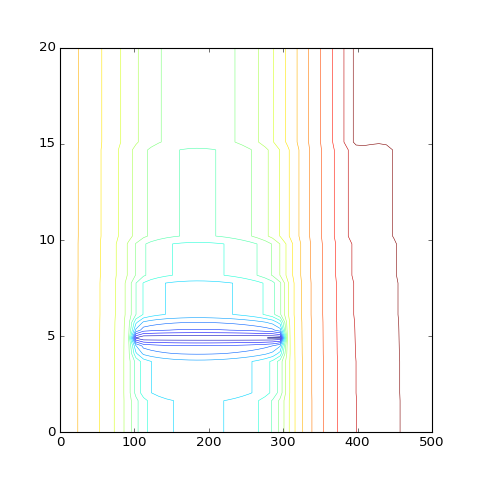

In [6]:
timvertcontour(ml, 
               x1=-200, y1=0, x2=300, y2=0, nx=50, 
               zmin=0, zmax=20, nz=50,
               levels=20,
               size=(6,6))

#### Exercise 4e
Change the entry resistance of the well and resolve the model. Notice the difference in the head inside the
well by checking the solution with `ls.check()`.

In [7]:
ls.check()
# Remove the old LineSinkDitch from the elementlist
ml.elementList.remove(ls)
# Add a new LinSinkDitch to the elementlist with a changed resistence
ls_new = LineSinkDitch(ml, xylist=xy, Q=10000, res=0.01, width=0.4, layers=[6])
#  Solve the model again with the new LineSinkDitch
ml.solve()
ls_new.check()

Linesink Ditch (-100, 0.0) to (100, 0.0)
Specified discharge: 10000.0 Computed discharge: 10000.0
Head in first line-sink: 13.2710135887
Linesink 1 head 13.2710135887 Specified delh: 0.0 Computed delh 2.6645352591e-14 Strength: 64.6186527728
Linesink 2 head 13.2710135887 Specified delh: 0.0 Computed delh 1.7763568394e-15 Strength: 53.4590728291
Linesink 3 head 13.2710135887 Specified delh: 0.0 Computed delh -2.6645352591e-14 Strength: 49.5637056629
Linesink 4 head 13.2710135887 Specified delh: 0.0 Computed delh 1.06581410364e-14 Strength: 47.1366339796
Linesink 5 head 13.2710135887 Specified delh: 0.0 Computed delh 5.3290705182e-15 Strength: 45.5172734038
Linesink 6 head 13.2710135887 Specified delh: 0.0 Computed delh 5.3290705182e-15 Strength: 44.4202099273
Linesink 7 head 13.2710135887 Specified delh: 0.0 Computed delh -1.06581410364e-14 Strength: 43.7100637447
Linesink 8 head 13.2710135887 Specified delh: 0.0 Computed delh 5.3290705182e-15 Strength: 43.3098819582
Linesink 9 head 13.